# Image Classification with the `CIFAR-10` dataset

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

Convolutional Neural Networks (`CNNs`) are a type of deep neural network commonly used in image, video, and audio recognition tasks. `CNNs` are designed to automatically learn and extract features from continuous data through a series of convolutional layers, pooling layers, and fully connected layers.

Convolutional layers use filters to convolve over the input and produce feature maps that capture the presence of certain features in the data. Pooling layers are used to downsample the feature maps and reduce the dimensionality of the data, while fully connected layers are used to perform classification or regression tasks based on the extracted features. 

`CNNs` have achieved state-of-the-art performance on a variety of tasks, such as object detection, image segmentation, and facial recognition, and are widely used in applications ranging from autonomous driving to medical diagnosis.

In this notebook, we will train a CNN on the `CIFAR-10` dataset. Later you can use this model to try some interpretability tools available in [this (feature visualization)](https://github.com/Nkluge-correa/teeny-tiny_castle/blob/fa17764aa8800c388d0d298b750c686757e0861e/ML%20Explainability/CV%20Interpreter/CNN_feature_visualization.ipynb), [this (attribution maps)](https://github.com/Nkluge-correa/teeny-tiny_castle/blob/fa17764aa8800c388d0d298b750c686757e0861e/ML%20Explainability/CV%20Interpreter/CNN_attribution_maps.ipynb), and [this (LIME)](https://github.com/Nkluge-correa/teeny-tiny_castle/blob/fa17764aa8800c388d0d298b750c686757e0861e/ML%20Explainability/CV%20Interpreter/CNN_attribution_maps_with_LIME.ipynb) notebook. You can also use the pre-trained model available in this repository.

![image](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

The `CIFAR-10` dataset ([Canadian Institute For Advanced Research](https://en.wikipedia.org/wiki/Canadian_Institute_for_Advanced_Research)) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The `CIFAR-10` dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

First, let us load the `CIFAR-10` Dataset.


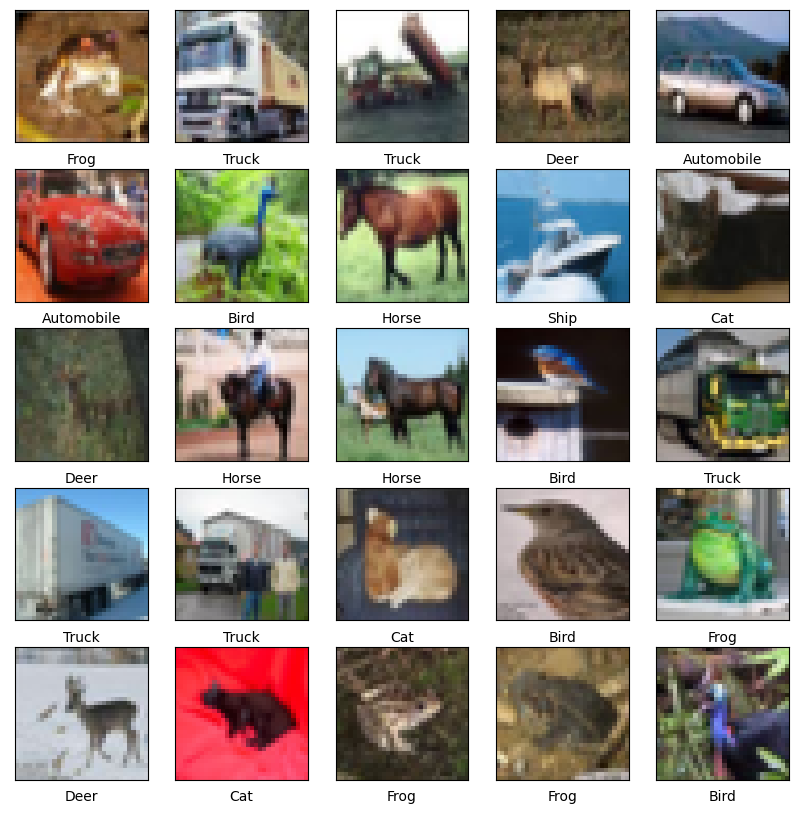

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images,
                               test_labels) = tf.keras.datasets.cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()


Preprocessing the samples into a "_CNN friendly_" format.

Normalizing pixel values between 0 and 1 before training a `CNN` with the `CIFAR-10` dataset is a common preprocessing step that helps to improve the stability and convergence of the training process. 

The `CIFAR-10` dataset contains images with pixel values in the range of 0 to 255, and normalizing these values between 0 and 1 ensures that the input data has a mean of 0 and a standard deviation of 1, which makes it easier for the `CNN` to learn.


In [2]:
from keras.utils import np_utils

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.
test_images = test_images / 255.

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


The architecture design below is really generic and can be reutilized for other types of classification problems. Here are its building blocks:

- A `Conv2D` layer is a fundamental building block of a `CNN`. It performs a convolution operation on the input data, which is typically an image, to extract features and patterns that are relevant to the task at hand. The `Conv2D` layer is composed of a set of learnable filters, or kernels, which are applied to the input data. Each filter is a small matrix that slides over the input data, computing the dot product between the filter and the overlapping region of the input. This produces a 2D feature map that represents the response of the filter at each location in the input. The layer then combines all the feature maps produced by the filters to create a new output tensor. To learn more about `convolution layers`, read "_[Neocognitron: A Self-organizing Neural Network Model for a Mechanism of Pattern Recognition Unaffected by Shift in Position](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf)_."
- Batch normalization is a technique used in deep learning to improve the performance and stability of neural networks. The `BatchNormalization` layer is a type of layer that implements this technique. During training, the input data to a neural network can have different distributions for each mini-batch, which can make it difficult to train the network. Batch normalization addresses this problem by normalizing the input to each layer, so that it has a mean of 0 and a variance of 1.
- The `MaxPooling2D` layer operates on a 2D input tensor, typically the output of a `Conv2D` layer. It applies a max pooling operation to the input, which involves dividing the input into rectangular regions and taking the maximum value within each region. The result is a downsampled version of the input that preserves the most important features of the image while reducing its spatial dimensions.
- The `Dropout` layer randomly drops out (or "turns off") a fraction of the input units of a layer during each training iteration. This means that the weights of those dropped-out units are not updated during that iteration, which can help prevent the network from relying too heavily on any one feature or combination of features.


In [6]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same',
          activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

But you can also try a CNN with a different kind of architecture and convolution layer, like Depthwise Separable Convolutions (`SeparableConv2D`).

Depthwise separable convolutions are a type of convolutional operation used in deep learning models. They are a more computationally efficient version of standard convolutional layers and consist of two distinct operations: `depthwise convolution/` and `pointwise convolution`.

- `Depthwise convolution`: applies a single filter per input channel, which means that it performs separate convolutions for each input channel. This operation helps to capture spatial correlations between neighboring pixels within each input channel.
- `Pointwise convolution`: performs a 1x1 convolution across all channels, which allows the network to learn linear combinations of the features obtained from depthwise convolution. The output of these two operations is then combined to produce the final output of the depthwise separable convolution.

Overall, depthwise separable convolutions are more computationally efficient than standard convolutional layers because they use fewer parameters and operations.

To learn more about `depthwise separable convolutions`, read "_[Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)_"

In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.SeparableConv2D(32, (3, 3), padding='same',
          activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 32, 32, 32)       155       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 32, 32, 64)       2400      
 leConv2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 separable_conv2d_2 (Separab  (None, 16, 16, 64)       4

Now, let us train the architecture we chosen. We are going to be using 3 different callbacks to help us with our training:

- `ModelCheckpoint`: used to save the weights of the best-performing model during training. It allows the user to specify the metric to monitor and the frequency at which the weights should be saved. 
- `ReduceLROnPlateau`: used to reduce the learning rate of the optimizer if the model's performance on a validation set stops improving. This can help the model converge faster and can prevent the model from getting stuck in local optima.
- `EarlyStopping`: used to stop the training process if the performance of the model on a validation set stops improving for a specified number of epochs. This can help prevent overfitting and can save time by stopping the training process early if the model is not improving.


In [4]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "models/Cifar_CNN_SeparableConv2D.keras",
            save_best_only=True),  
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5),
    tf.keras.callbacks.EarlyStopping(
        monitor="categorical_accuracy",
        patience=10,
        verbose=2,
        mode="auto",
        baseline=None,
        restore_best_weights=True) 
]

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


model.fit(train_images, train_labels, batch_size=64, epochs=60,
                    validation_split=0.2, verbose=2, callbacks=callbacks)

test_loss_score, test_acc_score = model.evaluate(test_images, test_labels)

print(f'Final Loss: {round(test_loss_score, 2)}.')
print(f'Final Performance: {round(test_acc_score * 100, 2)} %.')


Version:  2.10.1
Eager mode:  True
GPU is available
Epoch 1/60
625/625 - 22s - loss: 1.4144 - categorical_accuracy: 0.4854 - val_loss: 2.1750 - val_categorical_accuracy: 0.2419 - lr: 0.0010 - 22s/epoch - 35ms/step
Epoch 2/60
625/625 - 19s - loss: 1.0630 - categorical_accuracy: 0.6178 - val_loss: 2.7662 - val_categorical_accuracy: 0.2659 - lr: 0.0010 - 19s/epoch - 30ms/step
Epoch 3/60
625/625 - 19s - loss: 0.9368 - categorical_accuracy: 0.6653 - val_loss: 1.3284 - val_categorical_accuracy: 0.5824 - lr: 0.0010 - 19s/epoch - 30ms/step
Epoch 4/60
625/625 - 19s - loss: 0.8438 - categorical_accuracy: 0.7009 - val_loss: 1.1884 - val_categorical_accuracy: 0.6043 - lr: 0.0010 - 19s/epoch - 30ms/step
Epoch 5/60
625/625 - 19s - loss: 0.7679 - categorical_accuracy: 0.7293 - val_loss: 1.1469 - val_categorical_accuracy: 0.6154 - lr: 0.0010 - 19s/epoch - 30ms/step
Epoch 6/60
625/625 - 19s - loss: 0.7034 - categorical_accuracy: 0.7533 - val_loss: 1.1225 - val_categorical_accuracy: 0.6188 - lr: 0.0010 

Congratulations, you have trained your own `CNN`. 🙃

---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).